In [11]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, spearmanr
import os
import matplotlib.pyplot as plt
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### DepreST-CAT Dataset

In [2]:
def get_scores(responses_dict, chat_gpt_scores_dict, scale_to_generate):
    gad_scores = []
    phq_scores = []
    chatgpt_scores = []
    for key in responses_dict:
        phq_responses = responses_dict[key][0]
        gad_responses = responses_dict[key][1]
        chatgpt_responses = chat_gpt_scores_dict[key]
        if(scale_to_generate == "phq"):
            assert(len(phq_responses) == len(chatgpt_responses))
        else:
            assert(len(gad_responses) == len(chatgpt_responses))

        gad_score = sum(gad_responses)
        phq_score = sum(phq_responses)
        chatgpt_score = sum(chatgpt_responses)
        gad_scores.append(gad_score)
        phq_scores.append(phq_score)
        chatgpt_scores.append(chatgpt_score)
    return phq_scores, gad_scores, chatgpt_scores

In [3]:
drive_base = "../"

In [4]:
with open(drive_base + "outputs/gpt-4-phq-given-gad", 'rb') as file:
        chat_gpt_scores_dict_phq = pickle.load(file)

with open(drive_base + "outputs/gpt-4-gad-given-phq", 'rb') as file:
        chat_gpt_scores_dict_gad = pickle.load(file)

with open(drive_base + "outputs/responses_gad_phq", 'rb') as file:
        original_data = pickle.load(file)

with open(drive_base + "outputs/gpt-4-phq-given-gad-demographics", 'rb') as file:
        chat_gpt_scores_dict_phq_demo = pickle.load(file)

with open(drive_base + "outputs/gpt-4-gad-given-phq-demographics", 'rb') as file:
        chat_gpt_scores_dict_gad_demo = pickle.load(file)

In [5]:
gad_scores = []
phq_scores = []
gpt_scores_gad = []
gpt_scores_phq = []
gpt_scores_phq_demo = []
gpt_scores_gad_demo = []
for key in original_data:
    phq_responses = original_data[key]['phq']
    gad_responses = original_data[key]['gad']
    gpt_responses_gad = chat_gpt_scores_dict_gad[key]
    gpt_responses_gad_demo = chat_gpt_scores_dict_gad_demo[key]
    gpt_responses_phq = chat_gpt_scores_dict_phq[key]
    gpt_responses_phq_demo = chat_gpt_scores_dict_phq_demo[key]

    gad_scores.append(sum(gad_responses))
    phq_scores.append(sum(phq_responses))
    gpt_scores_gad.append(sum(gpt_responses_gad))
    gpt_scores_phq.append(sum(gpt_responses_phq))
    gpt_scores_phq_demo.append(sum(gpt_responses_phq_demo))
    gpt_scores_gad_demo.append(sum(gpt_responses_gad_demo))


In [6]:
names_dict = {"phq": "PHQ-9", "gad": "GAD-7"}

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

def plot_scatter(scale_a, scale_b, scale_a_scores, scale_b_scores, chatgpt_scores):
    x_data = np.array([point for point in scale_a_scores])
    y_data = np.array([point for point in scale_b_scores])
    chat_gpt = np.array([point for point in chatgpt_scores])

    occurrences = {}
    for point in zip(x_data, y_data):
        if point in occurrences:
            occurrences[point] += 1
        else:
            occurrences[point] = 1

    # Extract x, y, and sizes from occurrences
    x_occ = [point[0] for point in occurrences]
    y_occ = [point[1] for point in occurrences]
    sizes = [occurrences[point] * 30 for point in occurrences]

    occurrences_c = {}
    for point in zip(x_data, chat_gpt):
        if point in occurrences_c:
            occurrences_c[point] += 1
        else:
            occurrences_c[point] = 1

    # Extract x, y, and sizes from occurrences
    x_occ_c = [point[0] for point in occurrences_c]
    y_occ_c = [point[1] for point in occurrences_c]
    sizes_c = [occurrences_c[point] * 50 for point in occurrences_c]

    sc1 = plt.scatter(x_occ, y_occ, label='Original Data', s=sizes, facecolors='none', edgecolors='#ff7f0e', linewidths=3)
    sc2 = plt.scatter(x_occ_c, y_occ_c, label=f'GPT-4 Data', s=sizes_c,facecolors='none', edgecolors="#1f77b4", linewidths=3)

    plt.xlabel(f'{names_dict[scale_a]} score', fontsize=14)
    plt.ylabel(f'{names_dict[scale_b]} score', fontsize=14)
    plt.title(f'{names_dict[scale_b]} given {names_dict[scale_a]}', fontsize=15)
    legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label='Original Data', markerfacecolor='#ff7f0e', markersize=15),
                      plt.Line2D([0], [0], marker='o', color='w', label='GPT-4 Data', markerfacecolor='#1f77b4', markersize=15)]

    plt.legend(handles=legend_handles, labels=['Original data', 'GPT-4 data'], fontsize='large', frameon=False)

    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.show()


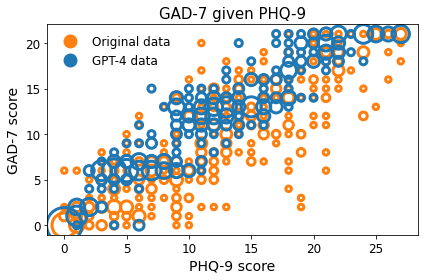

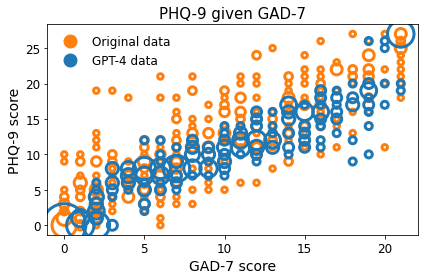

In [8]:
plot_scatter("phq", "gad", phq_scores, gad_scores, gpt_scores_gad)
plot_scatter("gad", "phq", gad_scores, phq_scores, gpt_scores_phq)

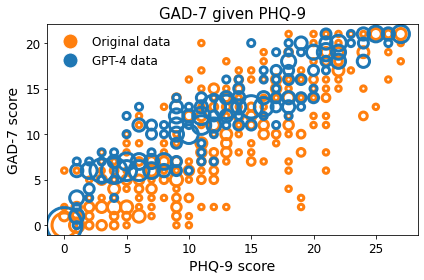

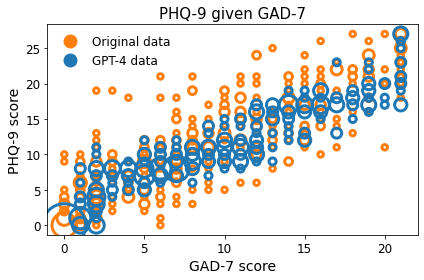

In [9]:
plot_scatter("phq", "gad", phq_scores, gad_scores, gpt_scores_gad_demo)
plot_scatter("gad", "phq", gad_scores, phq_scores, gpt_scores_phq_demo)

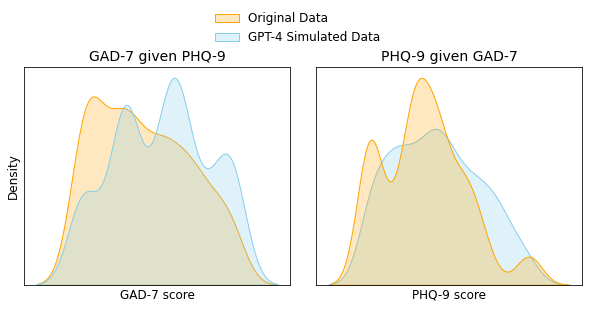

In [12]:
scale_a = "phq"
scale_b = "gad"
scale_a_scores = phq_scores
scale_b_scores = gad_scores
chatgpt_scores = gpt_scores_gad
chatgpt_scores_demo = gpt_scores_gad_demo

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
sns.kdeplot(scale_b_scores, color='orange', fill=True, label="Original Data", ax=axes[0])
sns.kdeplot(chatgpt_scores, color='skyblue', fill=True, label="GPT-4 Simulated Data", ax=axes[0])

axes[0].set_xlabel('GAD-7 score', fontsize=12)
axes[0].set_ylabel('Density', fontsize=12)
axes[0].set_title('GAD-7 given PHQ-9', fontsize=14)

scale_a = "gad"
scale_b = "phq"
scale_a_scores = gad_scores
scale_b_scores = phq_scores
chatgpt_scores = gpt_scores_phq
chatgpt_scores_demo = gpt_scores_phq_demo

sns.kdeplot(scale_b_scores, color='skyblue', fill=True, label="Original Data", ax=axes[1])
sns.kdeplot(chatgpt_scores, color='orange', fill=True, label="GPT-4 Simulated Data", ax=axes[1])

axes[1].set_xlabel('PHQ-9 score', fontsize=12)
axes[1].set_ylabel('')
axes[1].set_yticks([])
axes[1].set_xticks([])
axes[0].set_yticks([])
axes[0].set_xticks([])
axes[1].set_title('PHQ-9 given GAD-7', fontsize=14)

plt.subplots_adjust(wspace=0.1)


handles, labels = axes[0].get_legend_handles_labels()

fig.legend(handles, labels, loc='upper center',  bbox_to_anchor=(0.505, 1.11), fontsize="large", frameon=False)
plt.show()

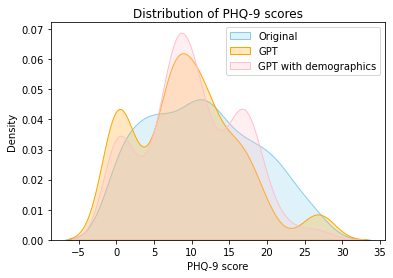

In [15]:
sns.kdeplot(scale_b_scores, color='skyblue', fill=True, label="Original")
sns.kdeplot(chatgpt_scores, color='orange', fill=True, label="GPT")
sns.kdeplot(chatgpt_scores_demo, color='pink', fill=True, label="GPT with demographics")
plt.xlabel('PHQ-9 score')
plt.ylabel('Density')
plt.title('Distribution of PHQ-9 scores')
plt.legend()
plt.show()

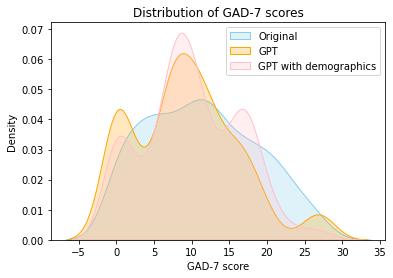

In [16]:
sns.kdeplot(scale_b_scores, color='skyblue', fill=True, label="Original")
sns.kdeplot(chatgpt_scores, color='orange', fill=True, label="GPT")
sns.kdeplot(chatgpt_scores_demo, color='pink', fill=True, label="GPT with demographics")

plt.xlabel('GAD-7 score')
plt.ylabel('Density')

plt.title('Distribution of GAD-7 scores')
plt.legend()
plt.show()

### StudentLife

In [17]:
scales = ['phq', 'pss', 'loneliness', 'flourishing']

In [18]:
names_dict = {"phq": "PHQ-9", "pss": "PSS", "loneliness": "Loneliness", "flourishing": "Flourishing"}

In [19]:
with open(drive_base + "outputs/studentLife-original-responses", 'rb') as file:
        responses_dict = pickle.load(file)

In [22]:
gpt_dict = {"phq":{}, "pss":{}, "loneliness":{}, "flourishing": {}}
for s in scales:
    for s_ in scales:
        if(s == s_):
            continue
        with open(drive_base + f"outputs/studentLife-GPT4-{s_}-given-{s}_iteration_0", 'rb') as file:
            chatgpt_dict = pickle.load(file)

        gpt_dict[s][s_] = chatgpt_dict


In [23]:
def get_scores_responses_student_life(responses, scale):
    if scale == "pss":
        return calculate_pss_score(responses)
    elif scale == "loneliness":
        return calculate_loneliness_score(responses)
    else:
        return sum(responses)

In [24]:
def calculate_loneliness_score(answers):
    assert (len(answers) == 20)

    reversed_scores = [4 - ans if i+1 in [1, 4, 5, 6, 8, 9, 10, 15, 16, 19, 20] else ans for i, ans in enumerate(answers)]

    # Calculate total score
    total_score = sum(reversed_scores)

    return total_score

In [25]:
def calculate_pss_score(answers):
    assert (len(answers) == 10)
    # Reverse scores for questions 4, 5, 7, and 8
    reversed_scores = [4 - ans if i in [3, 4, 6, 7] else ans for i, ans in enumerate(answers)]

    # Calculate total score
    total_score = sum(reversed_scores)

    return total_score

phq pss
phq loneliness
phq flourishing
pss phq
pss loneliness
pss flourishing
loneliness phq
loneliness pss
loneliness flourishing
flourishing phq
flourishing pss
flourishing loneliness


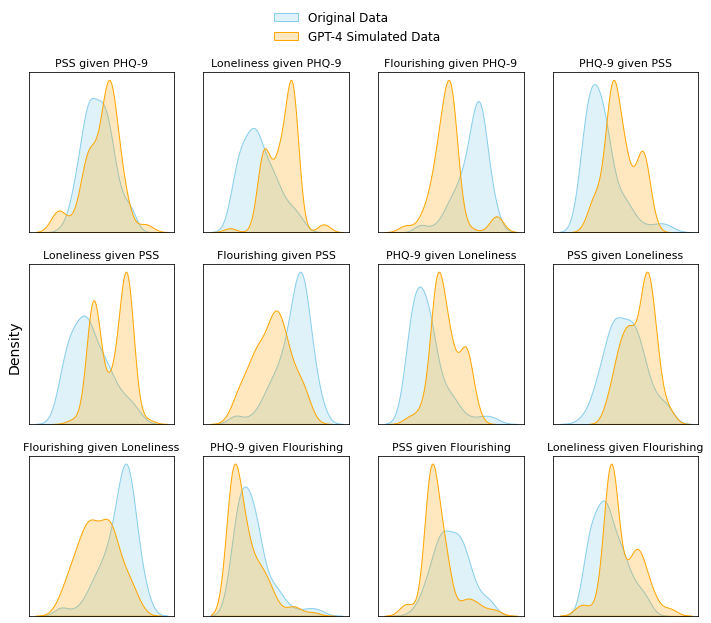

In [26]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(3, 4, figsize=(12, 10))

i = 0
j = 0
for scale_a in scales:
    for scale_b in scales:
        if scale_a != scale_b:
            scale_a_scores = []
            scale_b_scores = []
            print(scale_a, scale_b)
            for k in responses_dict:
                scale_a_scores.append(get_scores_responses_student_life(responses_dict[k][scale_b], scale_b))
                scale_b_scores.append(get_scores_responses_student_life(gpt_dict[scale_a][scale_b][k], scale_b))

            sns.kdeplot(scale_a_scores, color='skyblue', fill=True, label="Original Data", ax=ax[i, j])
            sns.kdeplot(scale_b_scores, color='orange', fill=True, label="GPT-4 Simulated Data", ax=ax[i, j])
            ax[i, j].set_yticks([])
            ax[i, j].set_xticks([])
            ax[i, j].set_ylabel('')
            ax[i, j].set_title(f'{names_dict[scale_b]} given {names_dict[scale_a]}', fontsize=11)

            j += 1
            if j == 4:
                i += 1
                j = 0

handles, labels = ax[0, 0].get_legend_handles_labels()
fig.text(0.1, 0.5, 'Density', va='center', rotation='vertical', fontsize=14)

fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.505, 0.98), fontsize='large', frameon=False)

plt.show()
